<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

任何工具和算法处理新数据之前，我们建议先进行数据探索。

In [10]:

# 导入pandas库。用于读csv
import pandas
# 我们可以检查代码中使用的文件路径是否与文件的存储位置匹配。比如，我自己的代码和数据都放在Colab笔记本的myo_gan文件夹中
# pandas DataFrame是一个与numpy数组相似的数据结构，具有许多附加功能，包括可为列和行命名，以及提供便利函数对数据求和和过滤等
df=pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/my_gan/mnist_train.csv',header=None)
# head()函数查看一个较大DataFrame的前几行,这里我们只显示数据集的前5行
df.head()
# 我们可以使用info()函数查看DataFrame的概况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


label=0
label= 0


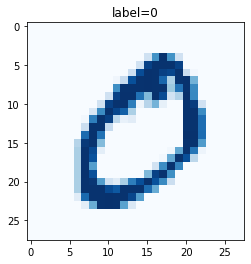

In [11]:
# 我们使用通用的matplotlib库来显示图像。在下面的代码中，我们导入matplotlib库的pyplot包。
import matplotlib.pyplot as plt
# 从DataFrame读入数据
# 首先，从MNIST数据中选取我们感兴趣的图像。第一幅图像，也就是第一行，可通过row = 0选定。df.iloc[row]选择数据集的第一行并赋值给变量data。
row=1
data=df.iloc[row]
# 接着，我们从该行中选择第一个数字，并将其命名为label，也就是标签。
# 然后选择该行中其余的784个值，并将它们重新映射为一个28 × 28的正方形数组。我们将这个数组赋值给变量img
label=data[0]
# 用+号时,您不能串联不同的数据类型对象。两个对象都必须是str类型。用逗号就可以
print("label="+str(label))
print("label=",label)
img=data[1:].values.reshape(28,28)
plt.title("label="+str(label))
# 绘制位图的imshow()函数有很多标签选项，我们使用的两个选项分别指示pyplot无须平滑像素以及指定调色板的颜色为蓝色。
plt.imshow(img,interpolation='none',cmap='Blues')
plt.show()




In [12]:
import pandas
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# 通过继承nn.Module，我们创建了一个神经网络类。它从nn. Module中继承了训练神经网络所需的大部分功能。
# 我们定义了处理信息的神经网络模块。对于简单的神经网络，我们选择使用精简的nn.Sequential方法。
# 我们定义了损失函数和更新网络可学习参数的优化器。
# 最后，我们添加了一个forward()函数，PyTorch会通过它将信息传递给网络。
class Classifier(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 400),
            # nn.Sigmoid(),
            nn.LeakyReLU(0.02),
            # nn.Tanh(),
            nn.LayerNorm(400),
            nn.Linear(400, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 100),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(100),
            nn.Linear(100, 10),
            # nn.Sigmoid()
            nn.LeakyReLU(0.02)
            # nn.Tanh(),
        )
        
        # create loss function
        # BCE只能处理0～1的值，而Leaky ReLU则有可能输出范围之外的值
        self.loss_function = nn.MSELoss()
        # self.loss_function=nn.BCELoss()

        # create optimiser, using simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        # self.optimiser=torch.optim.Adam(self.parameters())


        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, and update the weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass


(5,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

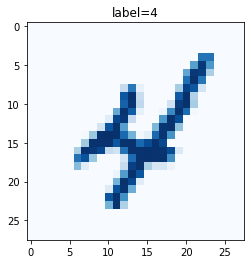

In [13]:
# 已经将一个CSV文件中的MNIST数据加载到pandas DataFrame中。我们完全可以继续从DataFrame中读取数据。
# 然而，为了学习PyTorch，我们应该尝试以PyTorch的方式加载和使用数据。
# PyTorch使用torch.utils.data.DataLoader实现了一些实用的功能，比如自动打乱数据顺序、多个进程并行加载、分批处理等，需要先将数据载入一个torch.utils.data.Dataset对象。
from torch.utils.data import Dataset
# 当我们从nn.Module继承一个神经网络类时，需要定义forward()函数。
# 同样地，对于继承自Dataset的数据集，我们需提供以下两个特殊的函数。
# __len__()，返回数据集中的项目总数。__getitem__()，返回数据集中的第n项。
# 我们会创建一个MnistDataset类，并提供__len__()方法，允许PyTorch通过len(mnist_dataset)获取数据集的大小。
# 同时，我们也会提供__getitem__()，允许我们通过索引获取项目，例如使用mnist_dataset[3]访问第4项。
class MnistDataset(Dataset):
    def __init__(self,csv_file):
        self.data_df=pandas.read_csv(csv_file,header=None)
    def __len__(self):
        return len(self.data_df)
    def __getitem__(self, index):
        # 目标图形标签
        label=self.data_df.iloc[index,0]
        target=torch.zeros((10))
        target[label]=1.0

        # 图像数据,取值范围0~255,标准化为0~1
        image_values=torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
        # 返回标签,图像数据张量和,目标张量
        return label,image_values,target

    # 我们也可以为MnistDataset类添加一个制图方法，以方便查看我们正在处理的数据。
    def plot_image(self,index):
        arr=self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label="+str(self.data_df.iloc[index,0]))
        plt.imshow(arr, interpolation='none', cmap='Blues')
        
# 让我们检查一下到目前为止是否一切正常。首先，我们从类中创建一个数据集对象，并将其CSV文件位置传递给它。
mnist_dataset=MnistDataset('/content/drive/MyDrive/Colab Notebooks/my_gan/mnist_train.csv')
# # 我们知道类构造函数将CSV文件中的数据加载到pandas DataFrame中。
# # 让我们使用plot_image()函数绘制数据集中的第10幅图像。第10幅图像的索引是9，因为第一幅的索引是0
mnist_dataset.plot_image(9)
# 检查mnist_dataset是否允许我们通过索引访问，例如mnist_dataset[100]。我们应该看到它返回标签、像素值和目标张量
mnist_dataset[100]

In [14]:


c=Classifier()
# 在MINIST数据集上训练神经网络
epochs=11
for i in range(epochs):
  print("training epoch",i+1,"of",epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
        c.train(image_data_tensor, target_tensor)


training epoch 1 of 11
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 11
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 11
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 11
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
training epoch 5 of 11
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
training epoch 6 of 11
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
training epoch 7 of 11
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
training epoch 8 of 11
counter =  430000
counter =  440000
counter =  450000
counter =  4600

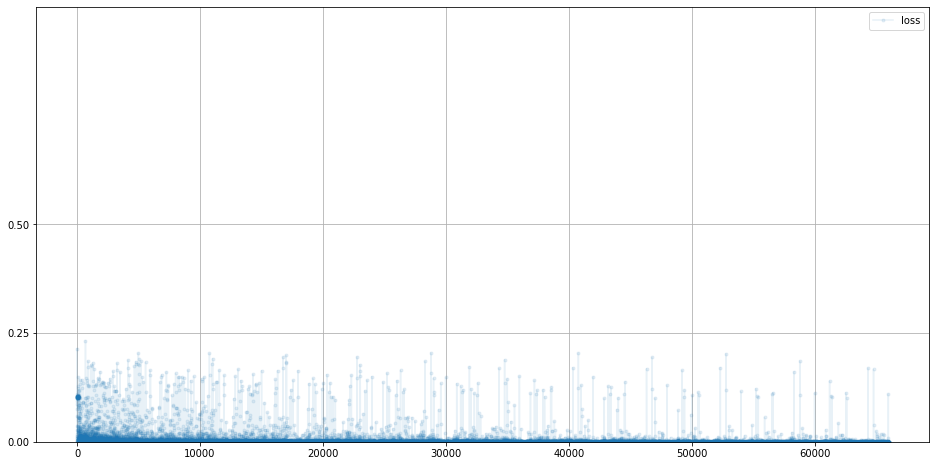

In [15]:
# 从上图可见，损失值从一开始迅速下降到大约0.1，并在训练过程中越来越慢地接近0。同时，噪声也非常多。
c.plot_progress()

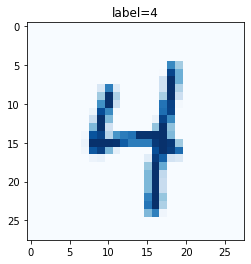

In [16]:
# 加载MNIST测试数据
mnist_test_dataset=MnistDataset("/content/drive/MyDrive/Colab Notebooks/my_gan/mnist_test.csv")
# 选一副画像
record=19
# 绘制
mnist_test_dataset.plot_image(record)


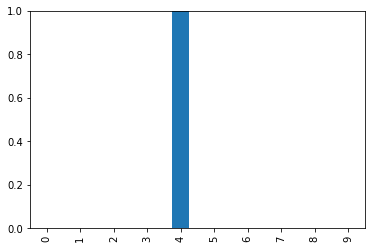

In [17]:
# 下面的代码继续使用第20幅图像并提取像素值作为image_data。
# 我们使用forward()函数将图像传递并通过神经网络。
image_data=mnist_test_dataset[record][1]
# 调用训练好的神经网络
output=c.forward(image_data)
# 绘制输出张量
# 输出被转换成一个简单的numpy数组，再被包装成一个DataFrame，以便绘制柱形图。
pandas.DataFrame(output.detach().numpy()).plot(kind="bar",legend=False,ylim=(0,1))

In [18]:
# 测试训练后的网络
score=0
items=0
for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer=c.forward(image_data_tensor).detach().numpy()
  if(answer.argmax()==label):
    score+=1
  items+=1
print(score,items,score/items)

9819 10000 0.9819
